In [34]:
import scipy.io
import scipy.ndimage
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy import sparse
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from Solver import nummodel, nummodel_jac, explicit_solve, implicit_solve
from NeuralNet import *
from timeit import default_timer



# Training a quadratic function

In [45]:
nn_save_name = "quadratic.nn"
N_train = 1000
x_train = np.linspace(-2,2, N_train).reshape((N_train, 1))
y_train = x_train ** 2
    
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

ind = x_train.shape[1]
outd = y_train.shape[1] 

learning_rate = 0.001
step_size = 100
gamma = 0.5  
epochs = 1000
batch_size = 64

layers = 2
width  = 20
model = FNN(ind, outd, layers, width) 

train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train, y_train), batch_size=batch_size, shuffle=True)

optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

myloss = torch.nn.MSELoss(reduction='sum')
t0 = default_timer()
for ep in range(epochs):
    model.train()
    t1 = default_timer()
    train_l2 = 0
    for x, y in train_loader:

        optimizer.zero_grad()
        out = model(x)
        
        loss = myloss(out , y)
        loss.backward()

        optimizer.step()
        train_l2 += loss.item()

    scheduler.step()

    if ep % 100 == 0:
        # train_l2/= ntrain
        t2 = default_timer()
        print("Epoch : ", ep, " Epoch time : ", t2-t1, " Train L2 Loss : ", train_l2)
    if nn_save_name is not None:
        torch.save(model, nn_save_name)
        


Epoch :  0  Epoch time :  0.02184672100156604  Train L2 Loss :  6546.390151977539
Epoch :  100  Epoch time :  0.011883748000400374  Train L2 Loss :  56.10937571525574
Epoch :  200  Epoch time :  0.011601293999774498  Train L2 Loss :  26.051971912384033
Epoch :  300  Epoch time :  0.010625201999573619  Train L2 Loss :  13.718351006507874
Epoch :  400  Epoch time :  0.010428534000311629  Train L2 Loss :  8.687187492847443
Epoch :  500  Epoch time :  0.010479051999936928  Train L2 Loss :  6.479779809713364
Epoch :  600  Epoch time :  0.010109230999660213  Train L2 Loss :  5.453245669603348
Epoch :  700  Epoch time :  0.011559786000361782  Train L2 Loss :  4.9603992104530334
Epoch :  800  Epoch time :  0.01026637199902325  Train L2 Loss :  4.721363410353661
Epoch :  900  Epoch time :  0.010381858000982902  Train L2 Loss :  4.603783443570137


# Testing on the quadratic function

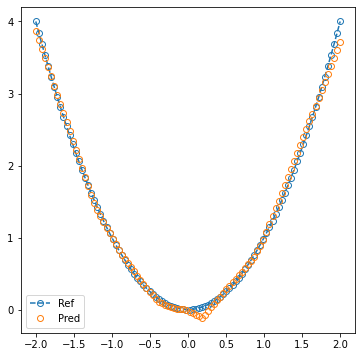

In [46]:
N_test = 100
x_test = np.linspace(-2,2, N_test).reshape((N_test, 1))
y_test = x_test ** 2
y_pred = model(torch.from_numpy(x_test.astype(np.float32))).detach().numpy()

fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(x_test,  y_test, "--o", fillstyle = "none", label="Ref")
ax.plot(x_test,  y_pred, "o",   fillstyle = "none", label="Pred")
ax.legend()

In [47]:
Ny = 100
L = 1.0
yy, dy = np.linspace(0, L, Ny), L/(Ny - 1)


def permeability(q):
    print("max q = ,")
    permeability = model(torch.from_numpy(q.reshape((q.size,1)).astype(np.float32))).detach().numpy()
    return permeability.flatten()

#     return q**2


f = (10*yy**4 - 20*yy**3 + 12*yy**2 - 2*yy)
q_sol = -yy*(yy - 1)



yy = np.linspace(0, L, Ny)
MODEL = "imp_nummodel"


if MODEL == "exp_nummodel":

    exp_model = lambda q, yy, res : nummodel(permeability, q, yy, res)
    yy, t_data, q_data = explicit_solve(exp_model, f, dt = 1.0e-4, Nt = 10000, save_every = 1, L = L)

elif MODEL == "imp_nummodel":
    
    imp_model = lambda q, yy, dt, res, V : nummodel_jac(permeability, q, yy, dt, res, V)  
    yy, t_data, q_data = implicit_solve(imp_model, f, dt = 1.0e-2, Nt = 10000, save_every = 1, L = L)
       
else:
    print("ERROR")


 



max q = ,
1 max q 0.0012610859822474805
max q = ,
2 max q 0.002862647859390663
max q = ,
3 max q 0.01596600995084445
max q = ,
4 max q 0.1745347754551099
max q = ,
5 max q 1.3333699619063422
max q = ,
6 max q 0.17663829799599468
max q = ,
7 max q 0.19476103815793527
max q = ,
8 max q 0.4716859837873148
max q = ,
9 max q 10.617414499430883
max q = ,
10 max q 9.196960768900816
max q = ,
11 max q 0.8490742743709221
max q = ,
12 max q 0.4807274742457408
max q = ,
13 max q 0.6246789411294081
max q = ,
14 max q 1.9430313391492628
max q = ,
15 max q 0.6114478759979677
max q = ,
16 max q 0.4408061168538937
max q = ,
17 max q 0.558943898883267
max q = ,
18 max q 0.5865592430393151
max q = ,
19 max q 0.5921701466231912
max q = ,
20 max q 0.3408303817481652
max q = ,
21 max q 0.46629331031869437
max q = ,
22 max q 0.5014767543617137
max q = ,
23 max q 0.4934278865042688
max q = ,
24 max q 0.5658814724803818
max q = ,
25 max q 0.9537009784234399
max q = ,
26 max q 0.28528829559338914
max q = ,
27 

350 max q 0.0
max q = ,
351 max q 0.0
max q = ,
352 max q 0.0
max q = ,
353 max q 0.0
max q = ,
354 max q 0.0
max q = ,
355 max q 0.0
max q = ,
356 max q 0.0
max q = ,
357 max q 0.0
max q = ,
358 max q 0.0
max q = ,
359 max q 0.0
max q = ,
360 max q 0.0
max q = ,
361 max q 0.0
max q = ,
362 max q 0.0
max q = ,
363 max q 0.0
max q = ,
364 max q 0.0
max q = ,
365 max q 0.0
max q = ,
366 max q 0.0
max q = ,
367 max q 0.0
max q = ,
368 max q 0.0
max q = ,
369 max q 0.0
max q = ,
370 max q 0.0
max q = ,
371 max q 0.0
max q = ,
372 max q 0.0
max q = ,
373 max q 0.0
max q = ,
374 max q 0.0
max q = ,
375 max q 0.0
max q = ,
376 max q 0.0
max q = ,
377 max q 0.0
max q = ,
378 max q 0.0
max q = ,
379 max q 0.0
max q = ,
380 max q 0.0
max q = ,
381 max q 0.0
max q = ,
382 max q 0.0
max q = ,
383 max q 0.0
max q = ,
384 max q 0.0
max q = ,
385 max q 0.0
max q = ,
386 max q 0.0
max q = ,
387 max q 0.0
max q = ,
388 max q 0.0
max q = ,
389 max q 0.0
max q = ,
390 max q 0.0
max q = ,
391 max q 0.0
ma

706 max q 3.423222156265401
max q = ,
707 max q 0.46095926135267096
max q = ,
708 max q 0.37793646431292904
max q = ,
709 max q 0.5619559453977041
max q = ,
710 max q 3.1928263956600382
max q = ,
711 max q 2.438491518094638
max q = ,
712 max q 1.7344052666752152
max q = ,
713 max q 1.0375339235128247
max q = ,
714 max q 0.8216169970804194
max q = ,
715 max q 0.559799640380217
max q = ,
716 max q 0.47550835241589107
max q = ,
717 max q 0.7691331429007238
max q = ,
718 max q 0.3546479037391502
max q = ,
719 max q 0.3996558078328899
max q = ,
720 max q 0.8277694440026861
max q = ,
721 max q 0.9563302926861377
max q = ,
722 max q 0.3565609237051731
max q = ,
723 max q 4.062020236129885
max q = ,
724 max q 0.2214137092143082
max q = ,
725 max q 1.0383491445981468
max q = ,
726 max q 0.7294200527108164
max q = ,
727 max q 0.398209106671954
max q = ,
728 max q 4.239619911237716
max q = ,
729 max q 0.6872536666193436
max q = ,
730 max q 0.5759259128886001
max q = ,
731 max q 1.0317140029934262

1061 max q 1.2882055632102274
max q = ,
1062 max q 1.4924750375068427
max q = ,
1063 max q 1.8931084673612724
max q = ,
1064 max q 2.763927003281114
max q = ,
1065 max q 2.3960504026988945
max q = ,
1066 max q 3.389225438982277
max q = ,
1067 max q 1.289577272467818
max q = ,
1068 max q 1.1364698274637344
max q = ,
1069 max q 1.0570926030115828
max q = ,
1070 max q 1.7465009607283148
max q = ,
1071 max q 0.8918078700182472
max q = ,
1072 max q 0.8481250222408061
max q = ,
1073 max q 1.623581429460234
max q = ,
1074 max q 0.7939025423399484
max q = ,
1075 max q 0.7606659195060755
max q = ,
1076 max q 1.4217309324169547
max q = ,
1077 max q 0.7737058911875897
max q = ,
1078 max q 0.8363956625471335
max q = ,
1079 max q 0.6863263527660594
max q = ,
1080 max q 0.6664569973078135
max q = ,
1081 max q 0.6486047085077441
max q = ,
1082 max q 16.413543412147497
max q = ,
1083 max q 0.6438348933610647
max q = ,
1084 max q 0.6187550601264332
max q = ,
1085 max q 2.247812348107954
max q = ,
1086 

1415 max q 0.6310019306317575
max q = ,
1416 max q 0.5384937685186633
max q = ,
1417 max q 0.6347603518402392
max q = ,
1418 max q 1.4808254686747333
max q = ,
1419 max q 1.1553814808891885
max q = ,
1420 max q 60.10146501642561
max q = ,
1421 max q 1.2014530942850916
max q = ,
1422 max q 0.4991310968928714
max q = ,
1423 max q 1.4940218876553988
max q = ,
1424 max q 0.7088749027054768
max q = ,
1425 max q 0.7940223809108168
max q = ,
1426 max q 1.2143628114769003
max q = ,
1427 max q 0.9721557327572494
max q = ,
1428 max q 1.4887977250746398
max q = ,
1429 max q 0.41446691476736786
max q = ,
1430 max q 0.21349139646703347
max q = ,
1431 max q 0.5687749058082628
max q = ,
1432 max q 8.28117816079557
max q = ,
1433 max q 0.055172908939191606
max q = ,
1434 max q 1.6060663273227296
max q = ,
1435 max q 0.6295970683407313
max q = ,
1436 max q 1.1330929029831722
max q = ,
1437 max q 1.339080230901553
max q = ,
1438 max q 0.6617792976702704
max q = ,
1439 max q 0.14241018058060126
max q = ,

1774 max q 0.31903127160611483
max q = ,
1775 max q 1.1779878603604523
max q = ,
1776 max q 0.7051685894239129
max q = ,
1777 max q 0.32497052978352753
max q = ,
1778 max q 0.34072393844718535
max q = ,
1779 max q 0.16857347825342234
max q = ,
1780 max q 0.42876359283263704
max q = ,
1781 max q 0.25478750737630995
max q = ,
1782 max q 0.1848194903310917
max q = ,
1783 max q 0.21792953122525055
max q = ,
1784 max q 0.1990333645108944
max q = ,
1785 max q 0.6240613079471563
max q = ,
1786 max q 0.32133673812794594
max q = ,
1787 max q 0.42285791267909456
max q = ,
1788 max q 3.254179736557851
max q = ,
1789 max q 0.3180992000769803
max q = ,
1790 max q 0.1017844809483919
max q = ,
1791 max q 0.4135850523168299
max q = ,
1792 max q 0.3248899219654299
max q = ,
1793 max q 3.1757582208550827
max q = ,
1794 max q 0.1413866460722069
max q = ,
1795 max q 0.23507333479796771
max q = ,
1796 max q 0.2653069546999052
max q = ,
1797 max q 0.10902086720608256
max q = ,
1798 max q 0.3267692518652003


2132 max q 1.0926621837837474
max q = ,
2133 max q 0.8053502969544963
max q = ,
2134 max q 14.909955465555322
max q = ,
2135 max q 3.0730550670046126
max q = ,
2136 max q 1.0238014936338782
max q = ,
2137 max q 1.664002479876462
max q = ,
2138 max q 34.63025230253368
max q = ,
2139 max q 0.44899491366891825
max q = ,
2140 max q 1.1689942540943665
max q = ,
2141 max q 10.614648390164824
max q = ,
2142 max q 1.5453867560670393
max q = ,
2143 max q 6.354604431329181
max q = ,
2144 max q 2.0364525305554118
max q = ,
2145 max q 1.052241051183068
max q = ,
2146 max q 2.7562585195715825
max q = ,
2147 max q 0.6521042235629588
max q = ,
2148 max q 1.2269939543756117
max q = ,
2149 max q 0.7994602513108193
max q = ,
2150 max q 0.7492278188945725
max q = ,
2151 max q 1.183836620112226
max q = ,
2152 max q 1.5059569835453321
max q = ,
2153 max q 0.8978624186691992
max q = ,
2154 max q 1.500910184456635
max q = ,
2155 max q 0.7357579868170194
max q = ,
2156 max q 3.331522139226056
max q = ,
2157 m

2481 max q 0.0
max q = ,
2482 max q 0.0
max q = ,
2483 max q 0.0
max q = ,
2484 max q 0.0
max q = ,
2485 max q 0.0
max q = ,
2486 max q 0.0
max q = ,
2487 max q 0.0
max q = ,
2488 max q 0.0
max q = ,
2489 max q 0.0
max q = ,
2490 max q 0.0
max q = ,
2491 max q 0.0
max q = ,
2492 max q 0.0
max q = ,
2493 max q 0.0
max q = ,
2494 max q 0.0
max q = ,
2495 max q 0.0
max q = ,
2496 max q 0.0
max q = ,
2497 max q 0.0
max q = ,
2498 max q 0.0
max q = ,
2499 max q 0.0
max q = ,
2500 max q 0.0
max q = ,
2501 max q 0.0
max q = ,
2502 max q 0.0
max q = ,
2503 max q 0.0
max q = ,
2504 max q 0.0
max q = ,
2505 max q 0.0
max q = ,
2506 max q 0.0
max q = ,
2507 max q 0.0
max q = ,
2508 max q 0.0
max q = ,
2509 max q 0.0
max q = ,
2510 max q 0.0
max q = ,
2511 max q 0.0
max q = ,
2512 max q 0.0
max q = ,
2513 max q 0.0
max q = ,
2514 max q 0.0
max q = ,
2515 max q 0.0
max q = ,
2516 max q 0.0
max q = ,
2517 max q 0.0
max q = ,
2518 max q 0.0
max q = ,
2519 max q 0.0
max q = ,
2520 max q 0.0
max q = ,


2837 max q 0.0
max q = ,
2838 max q 0.0
max q = ,
2839 max q 0.0
max q = ,
2840 max q 0.0
max q = ,
2841 max q 0.0
max q = ,
2842 max q 0.0
max q = ,
2843 max q 0.0
max q = ,
2844 max q 0.0
max q = ,
2845 max q 0.0
max q = ,
2846 max q 0.0
max q = ,
2847 max q 0.0
max q = ,
2848 max q 0.0
max q = ,
2849 max q 0.0
max q = ,
2850 max q 0.0
max q = ,
2851 max q 0.0
max q = ,
2852 max q 0.0
max q = ,
2853 max q 0.0
max q = ,
2854 max q 0.0
max q = ,
2855 max q 0.0
max q = ,
2856 max q 0.0
max q = ,
2857 max q 0.0
max q = ,
2858 max q 0.0
max q = ,
2859 max q 0.0
max q = ,
2860 max q 0.0
max q = ,
2861 max q 0.0
max q = ,
2862 max q 0.0
max q = ,
2863 max q 0.0
max q = ,
2864 max q 0.0
max q = ,
2865 max q 0.0
max q = ,
2866 max q 0.0
max q = ,
2867 max q 0.0
max q = ,
2868 max q 0.0
max q = ,
2869 max q 0.0
max q = ,
2870 max q 0.0
max q = ,
2871 max q 0.0
max q = ,
2872 max q 0.0
max q = ,
2873 max q 0.0
max q = ,
2874 max q 0.0
max q = ,
2875 max q 0.0
max q = ,
2876 max q 0.0
max q = ,


3196 max q 0.7825086936051082
max q = ,
3197 max q 4.251731129740375
max q = ,
3198 max q 0.9128935518051629
max q = ,
3199 max q 0.7625824282950628
max q = ,
3200 max q 0.5376480143186577
max q = ,
3201 max q 0.8754496781055711
max q = ,
3202 max q 0.390533406334179
max q = ,
3203 max q 63.14792550182524
max q = ,
3204 max q 1.6843562210129748
max q = ,
3205 max q 1.5723911345889592
max q = ,
3206 max q 1.4760619374139219
max q = ,
3207 max q 6.033113506171037
max q = ,
3208 max q 1.8933170728703783
max q = ,
3209 max q 0.6006808776600897
max q = ,
3210 max q 0.40838552455122856
max q = ,
3211 max q 6.111372961985995
max q = ,
3212 max q 2.0584386536796337
max q = ,
3213 max q 2.1313000377338684
max q = ,
3214 max q 0.8173761692606116
max q = ,
3215 max q 17.855485300891154
max q = ,
3216 max q 1.3904932848623386
max q = ,
3217 max q 1.193695495665824
max q = ,
3218 max q 2.7913729423532785
max q = ,
3219 max q 3.228029727037561
max q = ,
3220 max q 1.4009142328579565
max q = ,
3221 m

3557 max q 1.2317231918144258
max q = ,
3558 max q 2.117777796846895
max q = ,
3559 max q 0.6984328534485201
max q = ,
3560 max q 2.8655979658400534
max q = ,
3561 max q 0.6350885021675472
max q = ,
3562 max q 0.8636427466559771
max q = ,
3563 max q 0.5667536772291925
max q = ,
3564 max q 0.4839190559575404
max q = ,
3565 max q 5.160935356882952
max q = ,
3566 max q 3.6175425919735313
max q = ,
3567 max q 0.4489875817472895
max q = ,
3568 max q 0.5894794712952716
max q = ,
3569 max q 1.600090977957345
max q = ,
3570 max q 0.33920254206277667
max q = ,
3571 max q 2.5291199177371118
max q = ,
3572 max q 1.2411225209001682
max q = ,
3573 max q 1.294239551057736
max q = ,
3574 max q 0.757505791491285
max q = ,
3575 max q 5.237417234309393
max q = ,
3576 max q 1.0015535744258734
max q = ,
3577 max q 1.7279814953702586
max q = ,
3578 max q 1.3059273779474905
max q = ,
3579 max q 1.848985885080943
max q = ,
3580 max q 1.7435696872576947
max q = ,
3581 max q 0.5311947689111065
max q = ,
3582 m

3918 max q 0.8358489614270536
max q = ,
3919 max q 0.8172793248209294
max q = ,
3920 max q 0.8001676187061372
max q = ,
3921 max q 0.7797778545213997
max q = ,
3922 max q 0.7611272240314327
max q = ,
3923 max q 0.7446956485655514
max q = ,
3924 max q 0.7296133975954833
max q = ,
3925 max q 0.9960596850666831
max q = ,
3926 max q 0.7011738721877744
max q = ,
3927 max q 0.6882131562046451
max q = ,
3928 max q 1.4287298065559109
max q = ,
3929 max q 0.6637325671518647
max q = ,
3930 max q 0.6521816926247572
max q = ,
3931 max q 0.6412106463590416
max q = ,
3932 max q 0.6308164186683333
max q = ,
3933 max q 0.6210156220439903
max q = ,
3934 max q 0.6590250042763147
max q = ,
3935 max q 0.6038816529581147
max q = ,
3936 max q 0.5964297592596968
max q = ,
3937 max q 0.5895589270117866
max q = ,
3938 max q 0.5831265257492716
max q = ,
3939 max q 0.5771349156619773
max q = ,
3940 max q 11.888557375184005
max q = ,
3941 max q 58.64863205942603
max q = ,
3942 max q 1.0292146847481327
max q = ,
3

4270 max q 0.9845198939295826
max q = ,
4271 max q 0.601615707053508
max q = ,
4272 max q 0.590561313089371
max q = ,
4273 max q 0.5800161766658684
max q = ,
4274 max q 0.742963788550902
max q = ,
4275 max q 8.359260329104853
max q = ,
4276 max q 1.1913625410067428
max q = ,
4277 max q 0.796502280860487
max q = ,
4278 max q 0.5986434964316932
max q = ,
4279 max q 1.556181756732812
max q = ,
4280 max q 1.828811700705438
max q = ,
4281 max q 0.8949384057008465
max q = ,
4282 max q 0.771109494087361
max q = ,
4283 max q 0.5594525077054155
max q = ,
4284 max q 912.7132070773903
max q = ,
4285 max q 0.7423112647323611
max q = ,
4286 max q 0.6735640092638131
max q = ,
4287 max q 1.9865671389039923
max q = ,
4288 max q 1.6591774426077435
max q = ,
4289 max q 0.6992858262666797
max q = ,
4290 max q 0.5665265203912433
max q = ,
4291 max q 0.5510848960615808
max q = ,
4292 max q 0.5905307068222694
max q = ,
4293 max q 0.5259789423399392
max q = ,
4294 max q 0.5167855340932241
max q = ,
4295 max 

4632 max q 0.0
max q = ,
4633 max q 0.0
max q = ,
4634 max q 0.0
max q = ,
4635 max q 0.0
max q = ,
4636 max q 0.0
max q = ,
4637 max q 0.0
max q = ,
4638 max q 0.0
max q = ,
4639 max q 0.0
max q = ,
4640 max q 0.0
max q = ,
4641 max q 0.0
max q = ,
4642 max q 0.0
max q = ,
4643 max q 0.0
max q = ,
4644 max q 0.0
max q = ,
4645 max q 0.0
max q = ,
4646 max q 0.0
max q = ,
4647 max q 0.0
max q = ,
4648 max q 0.0
max q = ,
4649 max q 0.0
max q = ,
4650 max q 0.0
max q = ,
4651 max q 0.0
max q = ,
4652 max q 0.0
max q = ,
4653 max q 0.0
max q = ,
4654 max q 0.0
max q = ,
4655 max q 0.0
max q = ,
4656 max q 0.0
max q = ,
4657 max q 0.0
max q = ,
4658 max q 0.0
max q = ,
4659 max q 0.0
max q = ,
4660 max q 0.0
max q = ,
4661 max q 0.0
max q = ,
4662 max q 0.0
max q = ,
4663 max q 0.0
max q = ,
4664 max q 0.0
max q = ,
4665 max q 0.0
max q = ,
4666 max q 0.0
max q = ,
4667 max q 0.0
max q = ,
4668 max q 0.0
max q = ,
4669 max q 0.0
max q = ,
4670 max q 0.0
max q = ,
4671 max q 0.0
max q = ,


4986 max q 0.4398111514694478
max q = ,
4987 max q 0.4814129546422994
max q = ,
4988 max q 0.7819420264792805
max q = ,
4989 max q 0.4210885430797545
max q = ,
4990 max q 0.4765620499747317
max q = ,
4991 max q 0.3239124261786304
max q = ,
4992 max q 0.8245574798225452
max q = ,
4993 max q 0.6206387535078199
max q = ,
4994 max q 0.41172682039265607
max q = ,
4995 max q 0.5325309179087843
max q = ,
4996 max q 0.33217118297526255
max q = ,
4997 max q 0.4112050336232443
max q = ,
4998 max q 0.16024376619849787
max q = ,
4999 max q 0.7089849510729254
max q = ,
5000 max q 0.19513678416792032
max q = ,
5001 max q 0.2833694834384918
max q = ,
5002 max q 1.1681061974656564
max q = ,
5003 max q 0.3533489885567186
max q = ,
5004 max q 0.276665420246869
max q = ,
5005 max q 0.6724121610195118
max q = ,
5006 max q 0.5446487442760681
max q = ,
5007 max q 0.8517617546267346
max q = ,
5008 max q 1.877895414064492
max q = ,
5009 max q 0.9468916319584233
max q = ,
5010 max q 0.9087430994159829
max q = 

5340 max q 0.0
max q = ,
5341 max q 0.0
max q = ,
5342 max q 0.0
max q = ,
5343 max q 0.0
max q = ,
5344 max q 0.0
max q = ,
5345 max q 0.0
max q = ,
5346 max q 0.0
max q = ,
5347 max q 0.0
max q = ,
5348 max q 0.0
max q = ,
5349 max q 0.0
max q = ,
5350 max q 0.0
max q = ,
5351 max q 0.0
max q = ,
5352 max q 0.0
max q = ,
5353 max q 0.0
max q = ,
5354 max q 0.0
max q = ,
5355 max q 0.0
max q = ,
5356 max q 0.0
max q = ,
5357 max q 0.0
max q = ,
5358 max q 0.0
max q = ,
5359 max q 0.0
max q = ,
5360 max q 0.0
max q = ,
5361 max q 0.0
max q = ,
5362 max q 0.0
max q = ,
5363 max q 0.0
max q = ,
5364 max q 0.0
max q = ,
5365 max q 0.0
max q = ,
5366 max q 0.0
max q = ,
5367 max q 0.0
max q = ,
5368 max q 0.0
max q = ,
5369 max q 0.0
max q = ,
5370 max q 0.0
max q = ,
5371 max q 0.0
max q = ,
5372 max q 0.0
max q = ,
5373 max q 0.0
max q = ,
5374 max q 0.0
max q = ,
5375 max q 0.0
max q = ,
5376 max q 0.0
max q = ,
5377 max q 0.0
max q = ,
5378 max q 0.0
max q = ,
5379 max q 0.0
max q = ,


5695 max q 3.5244196326602557
max q = ,
5696 max q 1.1228908000158198
max q = ,
5697 max q 2.0537001816964313
max q = ,
5698 max q 1.5848961896558873
max q = ,
5699 max q 1.3410862320686572
max q = ,
5700 max q 1.235647561471107
max q = ,
5701 max q 1.9342773828406994
max q = ,
5702 max q 0.8764791246885888
max q = ,
5703 max q 1.495998541364096
max q = ,
5704 max q 2.0201097312133944
max q = ,
5705 max q 2.798341979398012
max q = ,
5706 max q 2.1918646294393698
max q = ,
5707 max q 3.811265471866328
max q = ,
5708 max q 18.289032334971353
max q = ,
5709 max q 3.7625828578565708
max q = ,
5710 max q 3.407922284657159
max q = ,
5711 max q 2.721399677328457
max q = ,
5712 max q 2.352550282514962
max q = ,
5713 max q 2.139295186131693
max q = ,
5714 max q 11.00676409158096
max q = ,
5715 max q 1.6412343553007076
max q = ,
5716 max q 1.4812689825819736
max q = ,
5717 max q 14.380536413500813
max q = ,
5718 max q 1.7910900340982694
max q = ,
5719 max q 1.0855816247232613
max q = ,
5720 max 

6053 max q 6.885797653533673
max q = ,
6054 max q 0.808348507081917
max q = ,
6055 max q 1.7556549131613854
max q = ,
6056 max q 0.5571021508505394
max q = ,
6057 max q 1.5187506327845155
max q = ,
6058 max q 0.8880701852410139
max q = ,
6059 max q 0.7308262208439942
max q = ,
6060 max q 1.1198044919045658
max q = ,
6061 max q 0.7452870584281936
max q = ,
6062 max q 2.6342323588740806
max q = ,
6063 max q 1.1491233723247056
max q = ,
6064 max q 2.6842780001332436
max q = ,
6065 max q 0.5036894842255552
max q = ,
6066 max q 0.4480576773435003
max q = ,
6067 max q 0.6140128370816933
max q = ,
6068 max q 1.7694737130746523
max q = ,
6069 max q 1.4916342889877363
max q = ,
6070 max q 0.718752170944365
max q = ,
6071 max q 0.6757345220119633
max q = ,
6072 max q 3.9286764059798465
max q = ,
6073 max q 97.99955090863568
max q = ,
6074 max q 0.8374962896307973
max q = ,
6075 max q 0.7497265166267765
max q = ,
6076 max q 1.2185611405526269
max q = ,
6077 max q 4.304649835313606
max q = ,
6078 

6408 max q 1.511811826660609
max q = ,
6409 max q 1.2265976310723516
max q = ,
6410 max q 1.1027088999342367
max q = ,
6411 max q 6.01893732934727
max q = ,
6412 max q 1.8314092487916083
max q = ,
6413 max q 3.5626279295837473
max q = ,
6414 max q 4.948436602740356
max q = ,
6415 max q 3.055977365441138
max q = ,
6416 max q 2.095143009273782
max q = ,
6417 max q 1.8522104645446174
max q = ,
6418 max q 3.9904455253900344
max q = ,
6419 max q 1.5568324487772063
max q = ,
6420 max q 1.9500326661234175
max q = ,
6421 max q 1.3047457084816876
max q = ,
6422 max q 1.242648560667747
max q = ,
6423 max q 19.24336847699973
max q = ,
6424 max q 1.1572523910992567
max q = ,
6425 max q 1.3260381370796792
max q = ,
6426 max q 1.0675035420765875
max q = ,
6427 max q 1.0216222521958351
max q = ,
6428 max q 1.006410357677179
max q = ,
6429 max q 0.9547652045524383
max q = ,
6430 max q 0.9305280089573226
max q = ,
6431 max q 0.9098781090857155
max q = ,
6432 max q 0.8904763023094128
max q = ,
6433 max 

6763 max q 0.24699899677220394
max q = ,
6764 max q 0.5803205316821629
max q = ,
6765 max q 3.4532504179398233
max q = ,
6766 max q 0.18190318978906964
max q = ,
6767 max q 0.2954242398159334
max q = ,
6768 max q 0.1416607723132745
max q = ,
6769 max q 0.1323943974976475
max q = ,
6770 max q 0.3220323020333353
max q = ,
6771 max q 0.12442986814658007
max q = ,
6772 max q 0.23069505561813233
max q = ,
6773 max q 0.4265879813419354
max q = ,
6774 max q 0.21737131686668648
max q = ,
6775 max q 0.22866127834091193
max q = ,
6776 max q 1.3782491559573453
max q = ,
6777 max q 0.12532238673680413
max q = ,
6778 max q 0.2859191056654441
max q = ,
6779 max q 1.3167800130425968
max q = ,
6780 max q 0.3086859923554428
max q = ,
6781 max q 1.0605495459893755
max q = ,
6782 max q 2.346380270254962
max q = ,
6783 max q 0.33235460734727196
max q = ,
6784 max q 0.6299227565149819
max q = ,
6785 max q 0.24393476751717147
max q = ,
6786 max q 0.291913892008071
max q = ,
6787 max q 0.3024286604981434
max

7125 max q 0.0
max q = ,
7126 max q 0.0
max q = ,
7127 max q 0.0
max q = ,
7128 max q 0.0
max q = ,
7129 max q 0.0
max q = ,
7130 max q 0.0
max q = ,
7131 max q 0.0
max q = ,
7132 max q 0.0
max q = ,
7133 max q 0.0
max q = ,
7134 max q 0.0
max q = ,
7135 max q 0.0
max q = ,
7136 max q 0.0
max q = ,
7137 max q 0.0
max q = ,
7138 max q 0.0
max q = ,
7139 max q 0.0
max q = ,
7140 max q 0.0
max q = ,
7141 max q 0.0
max q = ,
7142 max q 0.0
max q = ,
7143 max q 0.0
max q = ,
7144 max q 0.0
max q = ,
7145 max q 0.0
max q = ,
7146 max q 0.0
max q = ,
7147 max q 0.0
max q = ,
7148 max q 0.0
max q = ,
7149 max q 0.0
max q = ,
7150 max q 0.0
max q = ,
7151 max q 0.0
max q = ,
7152 max q 0.0
max q = ,
7153 max q 0.0
max q = ,
7154 max q 0.0
max q = ,
7155 max q 0.0
max q = ,
7156 max q 0.0
max q = ,
7157 max q 0.0
max q = ,
7158 max q 0.0
max q = ,
7159 max q 0.0
max q = ,
7160 max q 0.0
max q = ,
7161 max q 0.0
max q = ,
7162 max q 0.0
max q = ,
7163 max q 0.0
max q = ,
7164 max q 0.0
max q = ,


7462 max q 0.17971281278057216
max q = ,
7463 max q 0.048065699372618786
max q = ,
7464 max q 0.07947407154599703
max q = ,
7465 max q 0.09634263744932281
max q = ,
7466 max q 0.3147983356592593
max q = ,
7467 max q 0.11086925887184504
max q = ,
7468 max q 1.4379062879722202
max q = ,
7469 max q 0.3779320423817751
max q = ,
7470 max q 116.04417699020107
max q = ,
7471 max q 2.3675886382865445
max q = ,
7472 max q 0.5855883772486632
max q = ,
7473 max q 0.7213365617222521
max q = ,
7474 max q 0.18497853012883025
max q = ,
7475 max q 0.2910988192078806
max q = ,
7476 max q 0.42255250989955284
max q = ,
7477 max q 2.417387145691754
max q = ,
7478 max q 2.386380450263168
max q = ,
7479 max q 0.6716895340020579
max q = ,
7480 max q 0.6133145136576517
max q = ,
7481 max q 0.22334197209622408
max q = ,
7482 max q 0.2628948377870665
max q = ,
7483 max q 0.28446314700316366
max q = ,
7484 max q 0.4768702498804517
max q = ,
7485 max q 0.3605866375518095
max q = ,
7486 max q 0.1588771914395
max q

7811 max q 0.8018818003027499
max q = ,
7812 max q 0.5020583022782964
max q = ,
7813 max q 2.5517923379401286
max q = ,
7814 max q 0.49268121313140517
max q = ,
7815 max q 1.1430931492430345
max q = ,
7816 max q 0.6415731239061478
max q = ,
7817 max q 1.1203744900417991
max q = ,
7818 max q 0.8260853004542611
max q = ,
7819 max q 1.9358891860963752
max q = ,
7820 max q 0.6033675745937193
max q = ,
7821 max q 0.7326752723824832
max q = ,
7822 max q 0.9684151244274387
max q = ,
7823 max q 0.6239544975681424
max q = ,
7824 max q 1.5381124249661762
max q = ,
7825 max q 1.0970164094688157
max q = ,
7826 max q 4.990229686388314
max q = ,
7827 max q 0.8702831167502745
max q = ,
7828 max q 1.236450576397948
max q = ,
7829 max q 7.135348044969711
max q = ,
7830 max q 1.9068721121123415
max q = ,
7831 max q 0.7477605926774875
max q = ,
7832 max q 22.094678131216185
max q = ,
7833 max q 0.6003398831642804
max q = ,
7834 max q 2.101433946286198
max q = ,
7835 max q 0.7165367377655998
max q = ,
783

8173 max q 1.1992330643253923
max q = ,
8174 max q 5.867131115311108
max q = ,
8175 max q 0.5985107416583413
max q = ,
8176 max q 0.4081235832262749
max q = ,
8177 max q 0.22790196574146163
max q = ,
8178 max q 0.19886941885981094
max q = ,
8179 max q 0.17172227739378568
max q = ,
8180 max q 0.15207255755446764
max q = ,
8181 max q 0.09546069660146982
max q = ,
8182 max q 0.1897341727935536
max q = ,
8183 max q 0.09004777743024078
max q = ,
8184 max q 0.07214314236679434
max q = ,
8185 max q 0.3593197056809668
max q = ,
8186 max q 1.204167142527152
max q = ,
8187 max q 0.28468452506110853
max q = ,
8188 max q 0.48828253285191664
max q = ,
8189 max q 0.48318032221570284
max q = ,
8190 max q 0.7902034335697532
max q = ,
8191 max q 1.7544730039850491
max q = ,
8192 max q 1.9999156300722418
max q = ,
8193 max q 0.44445833766261655
max q = ,
8194 max q 0.3321613213289182
max q = ,
8195 max q 0.583177929523734
max q = ,
8196 max q 0.5119850729102124
max q = ,
8197 max q 0.7961170305664329
ma

8531 max q 0.23141975684598512
max q = ,
8532 max q 0.7915071988990476
max q = ,
8533 max q 0.25426333197039097
max q = ,
8534 max q 0.8643468126672358
max q = ,
8535 max q 0.5367185723562024
max q = ,
8536 max q 0.34123957061283516
max q = ,
8537 max q 0.44582395205924963
max q = ,
8538 max q 2.0171694853824036
max q = ,
8539 max q 0.44958265829547506
max q = ,
8540 max q 0.3808815456062309
max q = ,
8541 max q 0.8094482512923913
max q = ,
8542 max q 0.27503929874028743
max q = ,
8543 max q 0.3409697008511237
max q = ,
8544 max q 0.48871315933320064
max q = ,
8545 max q 0.5836518441033169
max q = ,
8546 max q 0.6309034556369623
max q = ,
8547 max q 0.0
max q = ,
8548 max q 0.0
max q = ,
8549 max q 0.0
max q = ,
8550 max q 0.0
max q = ,
8551 max q 0.0
max q = ,
8552 max q 0.0
max q = ,
8553 max q 0.0
max q = ,
8554 max q 0.0
max q = ,
8555 max q 0.0
max q = ,
8556 max q 0.0
max q = ,
8557 max q 0.0
max q = ,
8558 max q 0.0
max q = ,
8559 max q 0.0
max q = ,
8560 max q 0.0
max q = ,
856

8890 max q 0.5094385011752851
max q = ,
8891 max q 0.3989663885915683
max q = ,
8892 max q 1.6324107746733478
max q = ,
8893 max q 1.5259727192328367
max q = ,
8894 max q 0.485900099362633
max q = ,
8895 max q 0.37965874267760924
max q = ,
8896 max q 0.5125087012852265
max q = ,
8897 max q 0.9682793832269112
max q = ,
8898 max q 0.5315359527495702
max q = ,
8899 max q 0.40385278810501263
max q = ,
8900 max q 0.9148165029155344
max q = ,
8901 max q 7.8077991952509755
max q = ,
8902 max q 0.7402045092218743
max q = ,
8903 max q 1.1073595988433593
max q = ,
8904 max q 1.2721014372983144
max q = ,
8905 max q 1.5072864135294475
max q = ,
8906 max q 1.4872169246711324
max q = ,
8907 max q 1.0329406670153076
max q = ,
8908 max q 0.9473826759663273
max q = ,
8909 max q 3.225627943887005
max q = ,
8910 max q 0.6161331573912487
max q = ,
8911 max q 3.190057119855608
max q = ,
8912 max q 1.1745432582642878
max q = ,
8913 max q 0.7052304316271609
max q = ,
8914 max q 0.4871577686686825
max q = ,
8

9249 max q 2.199645231152293
max q = ,
9250 max q 1.363362738475039
max q = ,
9251 max q 1.457010831056746
max q = ,
9252 max q 1.2509124063312052
max q = ,
9253 max q 2.349115105296581
max q = ,
9254 max q 1.4047803734883118
max q = ,
9255 max q 0.6173629315563094
max q = ,
9256 max q 0.42012607016521947
max q = ,
9257 max q 0.49014684488789484
max q = ,
9258 max q 0.6367678583922901
max q = ,
9259 max q 3.8791002944053354
max q = ,
9260 max q 0.729335113514914
max q = ,
9261 max q 0.5023820966086576
max q = ,
9262 max q 0.4715379262224902
max q = ,
9263 max q 0.9294104150840652
max q = ,
9264 max q 1.3481835997326437
max q = ,
9265 max q 3.2310339212081884
max q = ,
9266 max q 5.934555992651893
max q = ,
9267 max q 4.981122291330741
max q = ,
9268 max q 1.3632679181854335
max q = ,
9269 max q 1.0525284172670686
max q = ,
9270 max q 6.507539812957081
max q = ,
9271 max q 0.684764786281687
max q = ,
9272 max q 2.9737296742089288
max q = ,
9273 max q 7.29161855574384
max q = ,
9274 max 

9602 max q 0.0
max q = ,
9603 max q 0.0
max q = ,
9604 max q 0.0
max q = ,
9605 max q 0.0
max q = ,
9606 max q 0.0
max q = ,
9607 max q 0.0
max q = ,
9608 max q 0.0
max q = ,
9609 max q 0.0
max q = ,
9610 max q 0.0
max q = ,
9611 max q 0.0
max q = ,
9612 max q 0.0
max q = ,
9613 max q 0.0
max q = ,
9614 max q 0.0
max q = ,
9615 max q 0.0
max q = ,
9616 max q 0.0
max q = ,
9617 max q 0.0
max q = ,
9618 max q 0.0
max q = ,
9619 max q 0.0
max q = ,
9620 max q 0.0
max q = ,
9621 max q 0.0
max q = ,
9622 max q 0.0
max q = ,
9623 max q 0.0
max q = ,
9624 max q 0.0
max q = ,
9625 max q 0.0
max q = ,
9626 max q 0.0
max q = ,
9627 max q 0.0
max q = ,
9628 max q 0.0
max q = ,
9629 max q 0.0
max q = ,
9630 max q 0.0
max q = ,
9631 max q 0.0
max q = ,
9632 max q 0.0
max q = ,
9633 max q 0.0
max q = ,
9634 max q 0.0
max q = ,
9635 max q 0.0
max q = ,
9636 max q 0.0
max q = ,
9637 max q 0.0
max q = ,
9638 max q 0.0
max q = ,
9639 max q 0.0
max q = ,
9640 max q 0.0
max q = ,
9641 max q 0.0
max q = ,


9960 max q 0.7089983826910152
max q = ,
9961 max q 5.464388237533124
max q = ,
9962 max q 1.3978885163238157
max q = ,
9963 max q 0.753031153995403
max q = ,
9964 max q 0.579915042526014
max q = ,
9965 max q 2.1600860648564564
max q = ,
9966 max q 0.5568515931882205
max q = ,
9967 max q 1.8066067253261657
max q = ,
9968 max q 0.5141194687796845
max q = ,
9969 max q 1.3480981952242683
max q = ,
9970 max q 1.386990956071989
max q = ,
9971 max q 0.82433120892267
max q = ,
9972 max q 3.490025483351645
max q = ,
9973 max q 0.4438482001517555
max q = ,
9974 max q 0.6955649822938215
max q = ,
9975 max q 0.45997697423860473
max q = ,
9976 max q 0.4855202716378043
max q = ,
9977 max q 0.6896539964680962
max q = ,
9978 max q 2.2340686187536
max q = ,
9979 max q 2.5269983344708207
max q = ,
9980 max q 0.6355568327859162
max q = ,
9981 max q 0.6008582918587794
max q = ,
9982 max q 0.3750446376793255
max q = ,
9983 max q 0.7773139232142224
max q = ,
9984 max q 2.53296024489511
max q = ,
9985 max q 

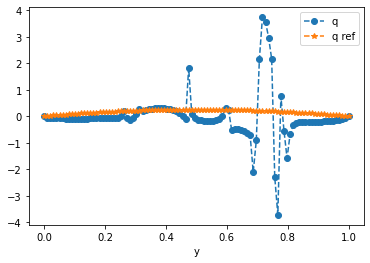

In [48]:

plt.figure()
# plt.plot(yy, np.mean(q_data[0, :], axis=0),  label="top")
# plt.plot(yy, np.mean(q_data[1, :], axis=0),  label="bottom")

plt.plot(yy, q_data[-1, :],  "--o", label="q")
plt.plot(yy, q_sol,  "--*", label="q ref")

plt.xlabel("y")
plt.legend()
plt.show()